<a href="https://colab.research.google.com/github/Jeffrowetull/DS-Unit-2-Sprint-5-Water-Pump-Challenge/blob/master/workpage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-  amount_tsh : Total static head (amount water available to waterpoint)
- date_recorded : The date the row was entered
- funder : Who funded the well
- gps_height : Altitude of the well
- installer : Organization that installed the well
- longitude : GPS coordinate
- latitude : GPS coordinate
- wpt_name : Name of the waterpoint if there is one
- num_private : No info given
- basin : Geographic water basin
- subvillage : Geographic location
- region : Geographic location
- region_code : Geographic location (coded)
- district_code : Geographic location (coded)
- lga : Geographic location
- ward : Geographic location
- population : Population around the well
- public_meeting : True/False
- recorded_by : Group entering this row of data
- scheme_management : Who operates the waterpoint
- scheme_name : Who operates the waterpoint
- permit : If the waterpoint is permitted
- construction_year : Year the waterpoint was constructed
- extraction_type : The kind of extraction the waterpoint uses
- extraction_type_group : The kind of extraction the waterpoint uses
- extraction_type_class : The kind of extraction the waterpoint uses
- management : How the waterpoint is managed
- management_group : How the waterpoint is managed
- payment : What the water costs
- payment_type : What the water costs
- water_quality : The quality of the water
- quality_group : The quality of the water
- quantity : The quantity of water
- quantity_group : The quantity of water
- source : The source of the water
- source_type : The source of the water
- source_class : The source of the water
- waterpoint_type : The kind of waterpoint
- waterpoint_type_group : The kind of waterpoint

In [118]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Jeffrowetull/DS-Unit-2-Sprint-5-Water-Pump-Challenge/master/train_features.csv'
url2 = 'https://raw.githubusercontent.com/Jeffrowetull/DS-Unit-2-Sprint-5-Water-Pump-Challenge/master/train_labels.csv'

train_features = pd.read_csv(url)
train_target = pd.read_csv(url2)
print( train_features.head())
print(train_target.head().T)

      id  amount_tsh  ...              waterpoint_type waterpoint_type_group
0  69572      6000.0  ...           communal standpipe    communal standpipe
1   8776         0.0  ...           communal standpipe    communal standpipe
2  34310        25.0  ...  communal standpipe multiple    communal standpipe
3  67743         0.0  ...  communal standpipe multiple    communal standpipe
4  19728         0.0  ...           communal standpipe    communal standpipe

[5 rows x 40 columns]
                       0           1           2               3           4
id                 69572        8776       34310           67743       19728
status_group  functional  functional  functional  non functional  functional


In [119]:
df = pd.merge(train_features,train_target, how='outer')
df.head()

id  amount_tsh  ... waterpoint_type_group    status_group
0  69572      6000.0  ...    communal standpipe      functional
1   8776         0.0  ...    communal standpipe      functional
2  34310        25.0  ...    communal standpipe      functional
3  67743         0.0  ...    communal standpipe  non functional
4  19728         0.0  ...    communal standpipe      functional

[5 rows x 41 columns]

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [121]:
df.describe(include='number')

id     amount_tsh  ...    population  construction_year
count  59400.000000   59400.000000  ...  59400.000000       59400.000000
mean   37115.131768     317.650385  ...    179.909983        1300.652475
std    21453.128371    2997.574558  ...    471.482176         951.620547
min        0.000000       0.000000  ...      0.000000           0.000000
25%    18519.750000       0.000000  ...      0.000000           0.000000
50%    37061.500000       0.000000  ...     25.000000        1986.000000
75%    55656.500000      20.000000  ...    215.000000        2004.000000
max    74247.000000  350000.000000  ...  30500.000000        2013.000000

[8 rows x 10 columns]

In [122]:
df.describe(exclude='number')

date_recorded                  funder  ... waterpoint_type_group status_group
count          59400                   55765  ...                 59400        59400
unique           356                    1897  ...                     6            3
top       2011-03-15  Government Of Tanzania  ...    communal standpipe   functional
freq             572                    9084  ...                 34625        32259

[4 rows x 31 columns]

#Baseline (54%)

In [123]:
base = df['status_group'].replace({'functional':1,'non functional':3, 'functional needs repair':2 })
base.value_counts(normalize=True)

1    0.543081
3    0.384242
2    0.072677
Name: status_group, dtype: float64

In [124]:
majority=base.mode()[0]
y_pred=[majority]*len(base)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print(accuracy_score(base,y_pred))
print('How is this different than the value counts?')


0.543080808080808
How is this different than the value counts?


#Fast Model (54%, 51%, 69%)

##Decision Sapling Numeric Only (54%)

In [125]:
from sklearn.model_selection import train_test_split
X_numeric= df.drop(columns='status_group').select_dtypes('number')
y = base


X_train, X_val, y_train, y_val =train_test_split(X_numeric,y, random_state=24, stratify=y)
X_train.shape

(44550, 10)

In [126]:
X_train.isnull().sum().sort_values()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_val)
y_pred_proba = tree.predict_proba(X_val)[:,1]



In [128]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(y_val,y_pred)

0.5393861225256901

##Logistic Regression Numeric Only (51%, 52% with standard scaling)

In [129]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
multiclass_roc_auc_score(y_val,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.515789454640326

In [130]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(
StandardScaler(),
LogisticRegression(solver='lbfgs',max_iter=1000)
)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_val)
multiclass_roc_auc_score(y_val, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.5160470148611064

##Logistic With Low Cardinality Categoricals (69% with OneHotEncoder)

In [131]:
!pip install category_encoders

In [0]:
import category_encoders as ce
X = df.drop(columns = 'status_group')

X_train, X_val, y_train, y_val = train_test_split(
X, y, random_state=24, stratify=y)

X_train.select_dtypes(exclude='number').nunique()
X_train_simple = X_train.drop(columns =['date_recorded','funder','installer','wpt_name','subvillage','ward','scheme_name'])
X_val_simple = X_val.drop(columns =['date_recorded','funder','installer','wpt_name','subvillage','ward','scheme_name'])

In [133]:
pipeline = make_pipeline(
ce.OneHotEncoder(use_cat_names=True),
StandardScaler(),
LogisticRegression(solver='lbfgs', max_iter=1000)
)

pipeline.fit(X_train_simple, y_train)
y_pred = pipeline.predict(X_val_simple)
multiclass_roc_auc_score(y_val, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.6935011193225389

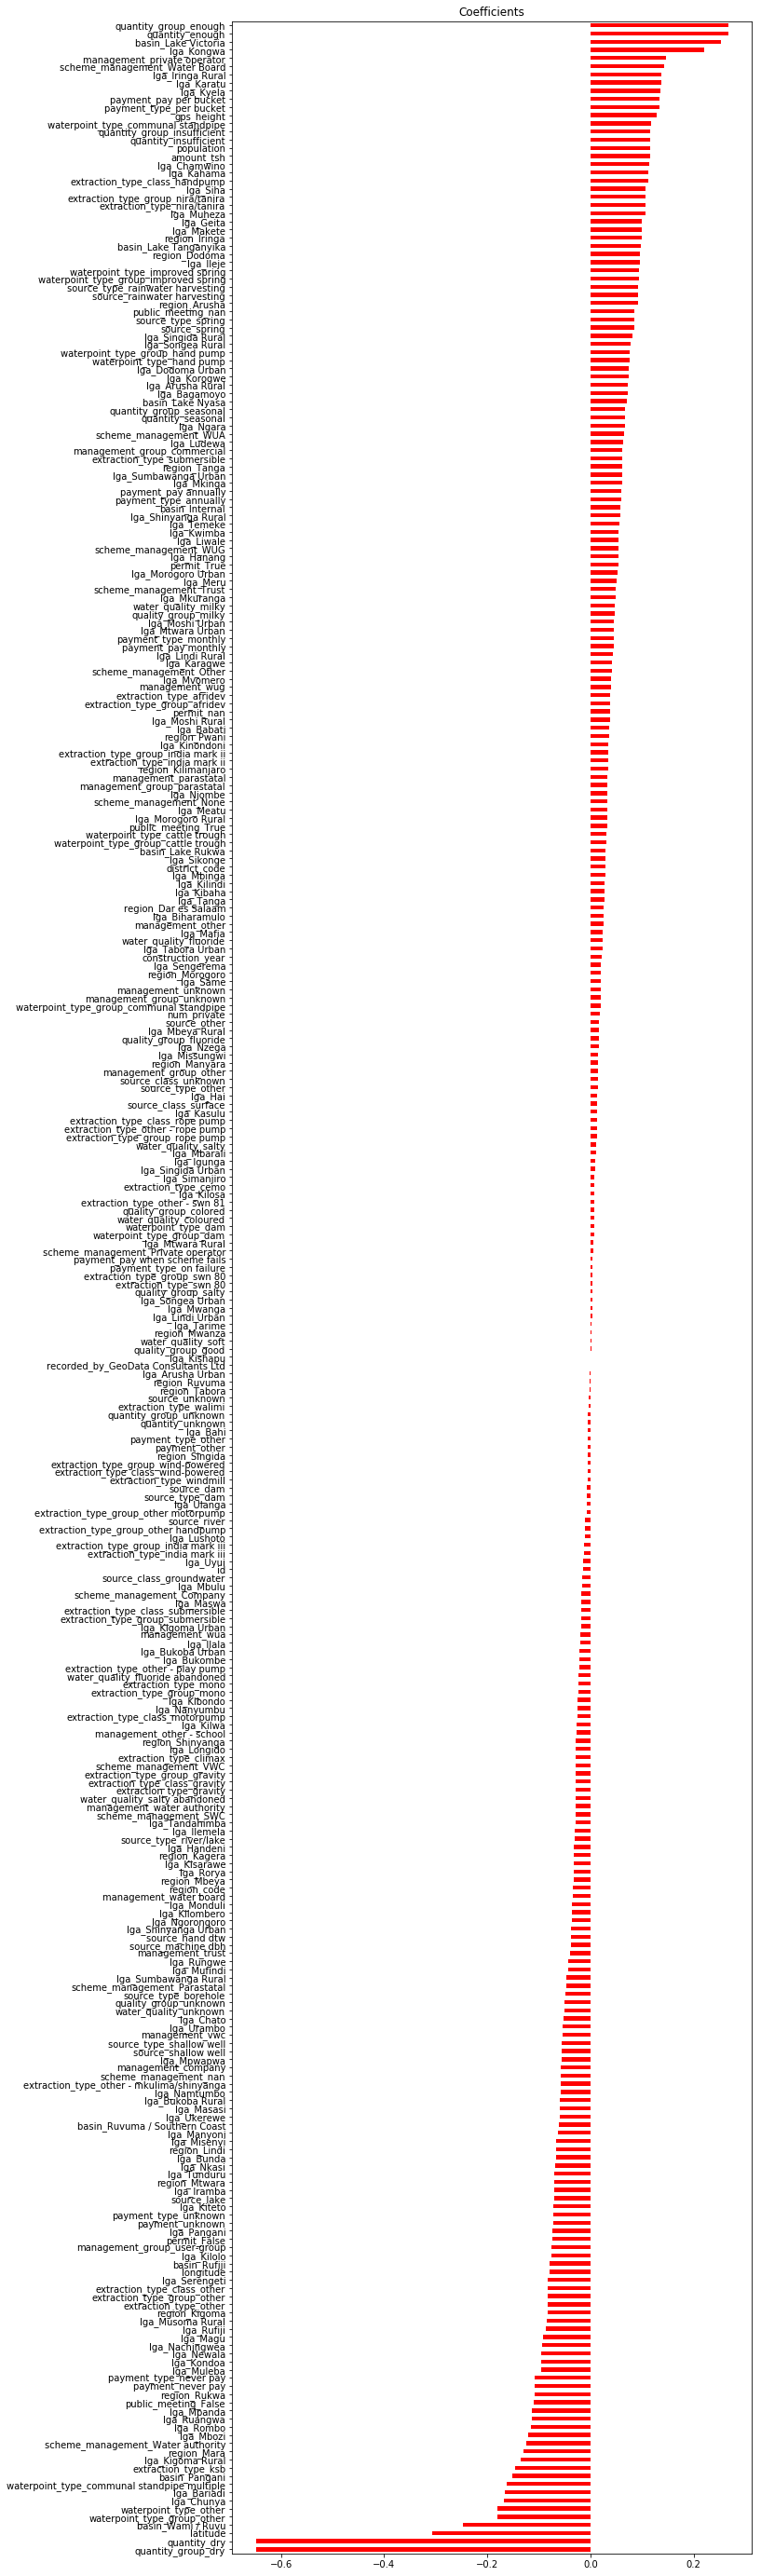

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,50))
plt.title('Coefficients')
coefficients = pipeline.named_steps['logisticregression'].coef_[0]
feature_names = pipeline.named_steps['onehotencoder'].transform(X_train_simple).columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='red')

#Wrangle 
##***Yee-haw***

In [135]:
X_train.isnull().sum().sort_values()

id                           0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
construction_year            0
payment_type                 0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
water_quality                0
waterpoint_type              0
recorded_by                  0
basin                        0
amount_tsh                   0
date_recorded                0
gps_height                   0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
population                   0
waterpoint_type_group        0
region                       0
region_code                  0
district_code                0
lga                          0
ward    

In [136]:
X_train.subvillage.count()

44267

In [137]:
many_nulls = ['subvillage','permit','public_meeting','funder','installer','scheme_management','scheme_name']

for column in many_nulls:
  print(column,'unique:',X_train[column].nunique())
  print(column,'nulls:',X_train[column].isnull().sum(),
        'percentage of whole:',X_train[column].isnull().sum()/X_train[column].count()*100,'%','\n')
  
X_train[many_nulls].describe()

subvillage unique: 16718
subvillage nulls: 283 percentage of whole: 0.6393024148914541 % 

permit unique: 2
permit nulls: 2292 percentage of whole: 5.423825074542099 % 

public_meeting unique: 2
public_meeting nulls: 2498 percentage of whole: 5.940264434509655 % 

funder unique: 1630
funder nulls: 2735 percentage of whole: 6.540715054406314 % 

installer unique: 1865
installer nulls: 2743 percentage of whole: 6.561102207764249 % 

scheme_management unique: 12
scheme_management nulls: 2915 percentage of whole: 7.001321003963012 % 

scheme_name unique: 2483
scheme_name nulls: 21092 percentage of whole: 89.913888652059 % 



subvillage permit public_meeting  ... installer scheme_management scheme_name
count       44267  42258          42052  ...     41807             41635       23458
unique      16718      2              2  ...      1865                12        2483
top       Shuleni   True           True  ...       DWE               VWC           K
freq          390  29184          38321  ...     13115             27645         521

[4 rows x 7 columns]

In [138]:
pd.DatetimeIndex(X_train['date_recorded']).year
print(-X_train['construction_year'].head())

42486    0
13443    0
44484    0
25450    0
20165    0
Name: construction_year, dtype: int64


In [139]:
X_train.drop(columns='date_recorded')

id  amount_tsh  ...              waterpoint_type  waterpoint_type_group
42486  61909         0.0  ...           communal standpipe     communal standpipe
13443  72226         0.0  ...                    hand pump              hand pump
44484  11583         0.0  ...                    hand pump              hand pump
25450  23298         0.0  ...                    hand pump              hand pump
20165  22576         0.0  ...           communal standpipe     communal standpipe
18477  34908       100.0  ...  communal standpipe multiple     communal standpipe
23152   9329       500.0  ...                    hand pump              hand pump
10171  19167        25.0  ...           communal standpipe     communal standpipe
33173  14197         0.0  ...  communal standpipe multiple     communal standpipe
12438  56930       500.0  ...  communal standpipe multiple     communal standpipe
9730    5212         0.0  ...           communal standpipe     communal standpipe
8091   24946         0.0  ...                    hand pump              hand pump
1655   54180        50.0  ...  communal standpipe multiple     communal standpipe
10488  15740         0.0  ...                    hand pump              hand pump
24151  26247         0.0  ...                        other                  other
55282  64315         0.0  ...                    hand pump              hand pump
16680  27702        25.0  ...  communal standpipe multiple     communal standpipe
24832  36725         0.0  ...           communal standpipe     communal standpipe
18598  20337         0.0  ...           communal standpipe     communal standpipe
27132  48883         0.0  ...           communal standpipe     communal standpipe
8262   37321         0.0  ...           communal standpipe     communal standpipe
53741  24099         0.0  ...                    hand pump              hand pump
26362  72789         0.0  ...           communal standpipe     communal standpipe
24500  60238         0.0  ...                        other                  other
40285  11715         0.0  ...              improved spring        improved spring
40402  18710         0.0  ...  communal standpipe multiple     communal standpipe
49911  61213      5000.0  ...           communal standpipe     communal standpipe
15279  51639         0.0  ...                    hand pump              hand pump
40361  40148        30.0  ...           communal standpipe     communal standpipe
48364   7222      2000.0  ...                    hand pump              hand pump
...      ...         ...  ...                          ...                    ...
11907  54156         0.0  ...           communal standpipe     communal standpipe
54347  30126         0.0  ...           communal standpipe     communal standpipe
57236    670        10.0  ...                    hand pump              hand pump
12402  26358         0.0  ...                    hand pump              hand pump
20978  29087       500.0  ...           communal standpipe     communal standpipe
9491   59035         0.0  ...                    hand pump              hand pump
16706  15688      1000.0  ...           communal standpipe     communal standpipe
50109   9151         0.0  ...           communal standpipe     communal standpipe
21385  57178      2000.0  ...                    hand pump              hand pump
30229   4107         0.0  ...           communal standpipe     communal standpipe
18232  21599         0.0  ...           communal standpipe     communal standpipe
37186   2873         0.0  ...           communal standpipe     communal standpipe
5186   65989         0.0  ...              improved spring        improved spring
25092  31755         0.0  ...           communal standpipe     communal standpipe
54312   5198         0.0  ...                    hand pump              hand pump
47586  47176         0.0  ...                    hand pump              hand pump
26738   9700        20.0  ...  communal standpipe multiple     communal st

In [0]:
def wrangle(X):
  X = X.copy()
  
  #drop things?
  X = X.drop(columns = ['scheme_name'])
  
  #dates?
  X['year_recorded'] = pd.DatetimeIndex(X['date_recorded']).year
  X['month_recorded'] = pd.DatetimeIndex(X['date_recorded']).month
  X['day_recorded'] = pd.DatetimeIndex(X['date_recorded']).day
  X = X.drop(columns='date_recorded')
  
  #rename for reading's sake
  X = X.rename({'amount_tsh':'total_water', 'wpt_name':'pump_name', 'lga':'geo_loc'}, axis = 'columns')
  
  #nulls?
  X['permit'] = X['permit'].fillna(False)
  X = X.fillna('n/a')
  X['construction_year'] = X['construction_year'].replace(0,1985)
  
  #feature engineer?
  
  #time since construction
  X['years_since_cons'] = X['year_recorded']-X['construction_year']
  
  return X

In [0]:
X_wr = wrangle(X)




In [150]:
X_trw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 42486 to 30352
Data columns (total 42 columns):
id                       44550 non-null int64
total_water              44550 non-null float64
funder                   44550 non-null object
gps_height               44550 non-null int64
installer                44550 non-null object
longitude                44550 non-null float64
latitude                 44550 non-null float64
pump_name                44550 non-null object
num_private              44550 non-null int64
basin                    44550 non-null object
subvillage               44550 non-null object
region                   44550 non-null object
region_code              44550 non-null int64
district_code            44550 non-null int64
geo_loc                  44550 non-null object
ward                     44550 non-null object
population               44550 non-null int64
public_meeting           44550 non-null object
recorded_by              44550 non-null obje

In [157]:
encoder = ce.LeaveOneOutEncoder()

X_encoded = encoder.fit_transform(X_wr,y)

y

0        1
1        1
2        1
3        3
4        1
5        1
6        3
7        3
8        3
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       3
17       3
18       2
19       1
20       1
21       1
22       2
23       1
24       1
25       2
26       1
27       1
28       3
29       1
        ..
59370    1
59371    3
59372    3
59373    1
59374    1
59375    1
59376    3
59377    3
59378    1
59379    1
59380    3
59381    3
59382    3
59383    1
59384    3
59385    1
59386    1
59387    1
59388    1
59389    1
59390    1
59391    3
59392    3
59393    1
59394    3
59395    1
59396    1
59397    1
59398    1
59399    1
Name: status_group, Length: 59400, dtype: int64

#Gradient Booster

In [0]:
url3= 'https://raw.githubusercontent.com/Jeffrowetull/DS-Unit-2-Sprint-5-Water-Pump-Challenge/master/test_features.csv'
X_test = pd.read_csv(url3)
X_test = wrangle(X_test)
X_test = encoder.transform(X_test)

In [191]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_encoded,y)
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
y_pred=pd.DataFrame(y_pred)

In [0]:
y_pred= y_pred.rename({0:'status_group'},axis=1)

In [0]:
y_pred = y_pred.replace({1:'functional', 3:'non functional', 2:'functional needs repair'})

In [0]:


def create_submission(y_test_pred):
    sample_submission = pd.read_csv('sample_submission.csv')
    submission = sample_submission.copy()
    submission['status_group'] = y_test_pred
    
    now = pd.to_datetime('now')
    filename = 'MB_' + str(now).replace(' ','_')[0:-7] 
    
    submission.to_csv(f'{filename}.csv', index=False)
    
create_submission(y_pred)

In [161]:
gridsearch.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, criterion='mse', gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=287,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=24,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [165]:
gridsearch.best_score_

-9.537726540356774e-06

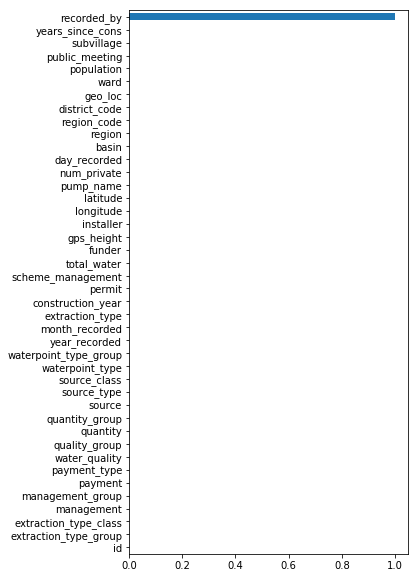

In [164]:
plt.figure(figsize=(5,10))
importances = pd.Series(gridsearch.best_estimator_.feature_importances_,X_encoded.columns)
importances.sort_values().plot.barh()